В работе используется датасет с данными о молодых людях в возрасте 23 лет. Датасет очищен от миссингов полностью (для простоты дальнейшей работы).

В датасете есть 13 переменных (столбцов):
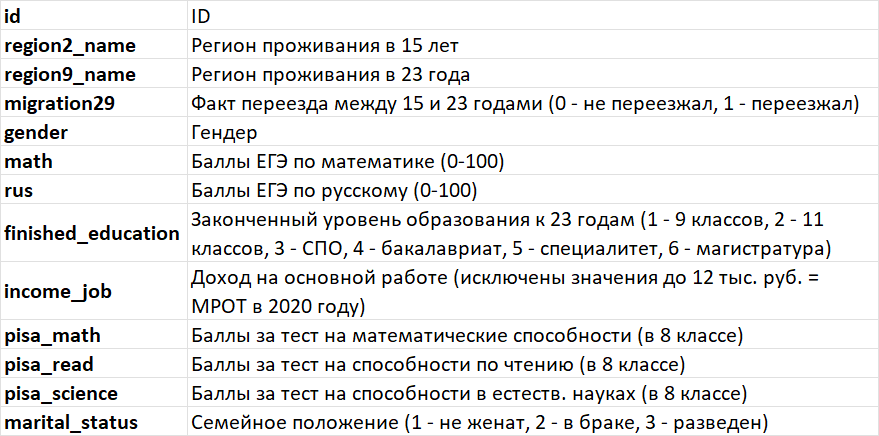

Загрузим данные и изучим их структуру

In [3]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('Файл "{name}" успешно загружен. Размер файла: {length} байт'.format(
        name=filename, length=len(uploaded[filename])))

Saving datapython2.csv to datapython2.csv
Файл "datapython2.csv" успешно загружен. Размер файла: 182252 байт


In [6]:
import pandas as pd

# Загрузка данных из CSV файла
df = pd.read_csv('datapython2.csv', sep=';')

# Просмотр первых нескольких строк данных
print("Первые несколько строк данных:")
print(df.head())

# Просмотр информации о данных
print("\nИнформация о данных:")
print(df.info())

# Просмотр статистического описания данных
print("\nСтатистическое описание данных:")
print(df.describe())


Первые несколько строк данных:
        id                         region2_name  \
0  3010113  Республика Северная Осетия (Алания)   
1  3020102  Республика Северная Осетия (Алания)   
2  3020107  Республика Северная Осетия (Алания)   
3  3020108  Республика Северная Осетия (Алания)   
4  3020111  Республика Северная Осетия (Алания)   

                          region9_name  migration29 gender  math  rus  \
0  Республика Северная Осетия (Алания)            0    муж    67   59   
1  Республика Северная Осетия (Алания)            0    жен    24   49   
2  Республика Северная Осетия (Алания)            0    муж    40   50   
3  Республика Северная Осетия (Алания)            0    муж    55   60   
4                  Сахалинская область            1    муж    55   40   

   finished_education  income_job  pisa_math  pisa_read  pisa_science  \
0                   3       28000    461.608    372.082       529.038   
1                   4       25000    470.874    509.950       509.736   
2   

Убедимся, что в данных нет NA

In [7]:
# Проверка наличия пропущенных значений в данных
missing_values = df.isnull().sum()

# Вывод количества пропущенных значений в каждом столбце
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)


Количество пропущенных значений в каждом столбце:
id                    0
region2_name          0
region9_name          0
migration29           0
gender                0
math                  0
rus                   0
finished_education    0
income_job            0
pisa_math             0
pisa_read             0
pisa_science          0
marital_status        0
dtype: int64


Преобразуем названия регионов в числа. Используем для этого метод Label Encoding. One hot encoding не используем, т.к. регионов слишком много и наш датасет сильно увеличится.

In [8]:
from sklearn.preprocessing import LabelEncoder

# Создаем объект LabelEncoder для столбца region2_name
label_encoder_region2 = LabelEncoder()
df['region2_label_encoded'] = label_encoder_region2.fit_transform(df['region2_name'])

# Создаем объект LabelEncoder для столбца region9_name
label_encoder_region9 = LabelEncoder()
df['region9_label_encoded'] = label_encoder_region9.fit_transform(df['region9_name'])

# Выводим уникальные коды регионов для обоих столбцов
print("Уникальные коды регионов для region2_name:")
print(df['region2_label_encoded'].unique())
print("\nУникальные коды регионов для region9_name:")
print(df['region9_label_encoded'].unique())


Уникальные коды регионов для region2_name:
[26  0  3 13 16 18 28 17 41  2 22 30 38 31 42 15 34  1 14  5 10 12 11 20
 29 32 39 24 25 27  8  9 33 35 40 37  4 23  6  7 36 21 19]

Уникальные коды регионов для region9_name:
[41 48 51 19 23 26  0  5 46  4 34  8 10 63 18 13 29 21 35 24 38 39 43 42
 60 61  2 47 31 32 58 49 45 56 54 62  7 20 12 33 15  1  6 57 17 36 52 16
 27 44 11 22 40 55 50 37 59  3  9 14 53 30 28 25]


Также преобразуем переменную гендер, чтобы значению "жен" соответствовал 0, значению "муж" - 1.

In [10]:
# Создаем объект LabelEncoder
label_encoder_gender = LabelEncoder()

# Применяем Label Encoding к столбцу с гендером
df['gender_encoded'] = label_encoder_gender.fit_transform(df['gender'])

# Выводим уникальные коды гендеров
print("Уникальные коды гендеров:")
print(df['gender_encoded'].unique())
print(df['gender_encoded'].value_counts())


Уникальные коды гендеров:
[1 0]
0    742
1    564
Name: gender_encoded, dtype: int64


Визуализируем наши переменные

В каких регионах проживали респонденты в 15 лет и в каких регионах стали проживать в 23 года:

In [12]:
# Создаем частотную таблицу для region2_name
region2_freq_table = df['region2_name'].value_counts()

# Создаем частотную таблицу для region9_name
region9_freq_table = df['region9_name'].value_counts()

# Выводим частотные таблицы
print("Частотная таблица для region2_name:")
print(region2_freq_table)
print("\nЧастотная таблица для region9_name:")
print(region9_freq_table)


Частотная таблица для region2_name:
Москва и Московская область                109
Кемеровская область                         60
Краснодарский край                          56
Самарская область                           46
Курская область                             44
Новосибирская область                       43
Республика Башкортостан                     43
Новгородская область                        40
Ростовская область                          40
Республика Татарстан                        40
Нижегородская область                       38
Красноярский край                           38
Волгоградская область                       37
Свердловская область                        36
Ставропольский край                         34
Пермский край                               34
Астраханская область                        33
Иркутская область                           33
Республика Дагестан                         32
Амурская область                            32
Тульская область        

Посмотрим количество и доли переехавших (сменивших регион между 15 и 23 годами)

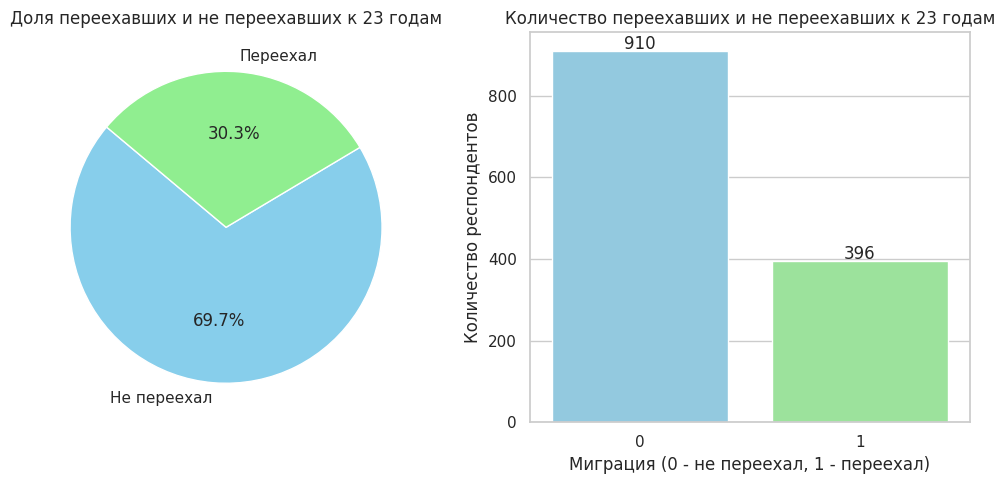

In [22]:
# Создание данных для визуализации
migration_counts = df['migration29'].value_counts()
migration_labels = ['Не переехал', 'Переехал']

# Создание графика круговой диаграммы
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(migration_counts, labels=migration_labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Доля переехавших и не переехавших к 23 годам')

# Создание графика гистограммы с количеством на столбиках
plt.subplot(1, 2, 2)
ax = sns.countplot(data=df, x='migration29', hue='migration29', palette=['skyblue', 'lightgreen'], legend=False)
plt.title('Количество переехавших и не переехавших к 23 годам')
plt.xlabel('Миграция (0 - не переехал, 1 - переехал)')
plt.ylabel('Количество респондентов')

# Добавление количества на столбики
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

Посмотрим на топ-20 регионов, куда переезжали респонденты к 23 годам.

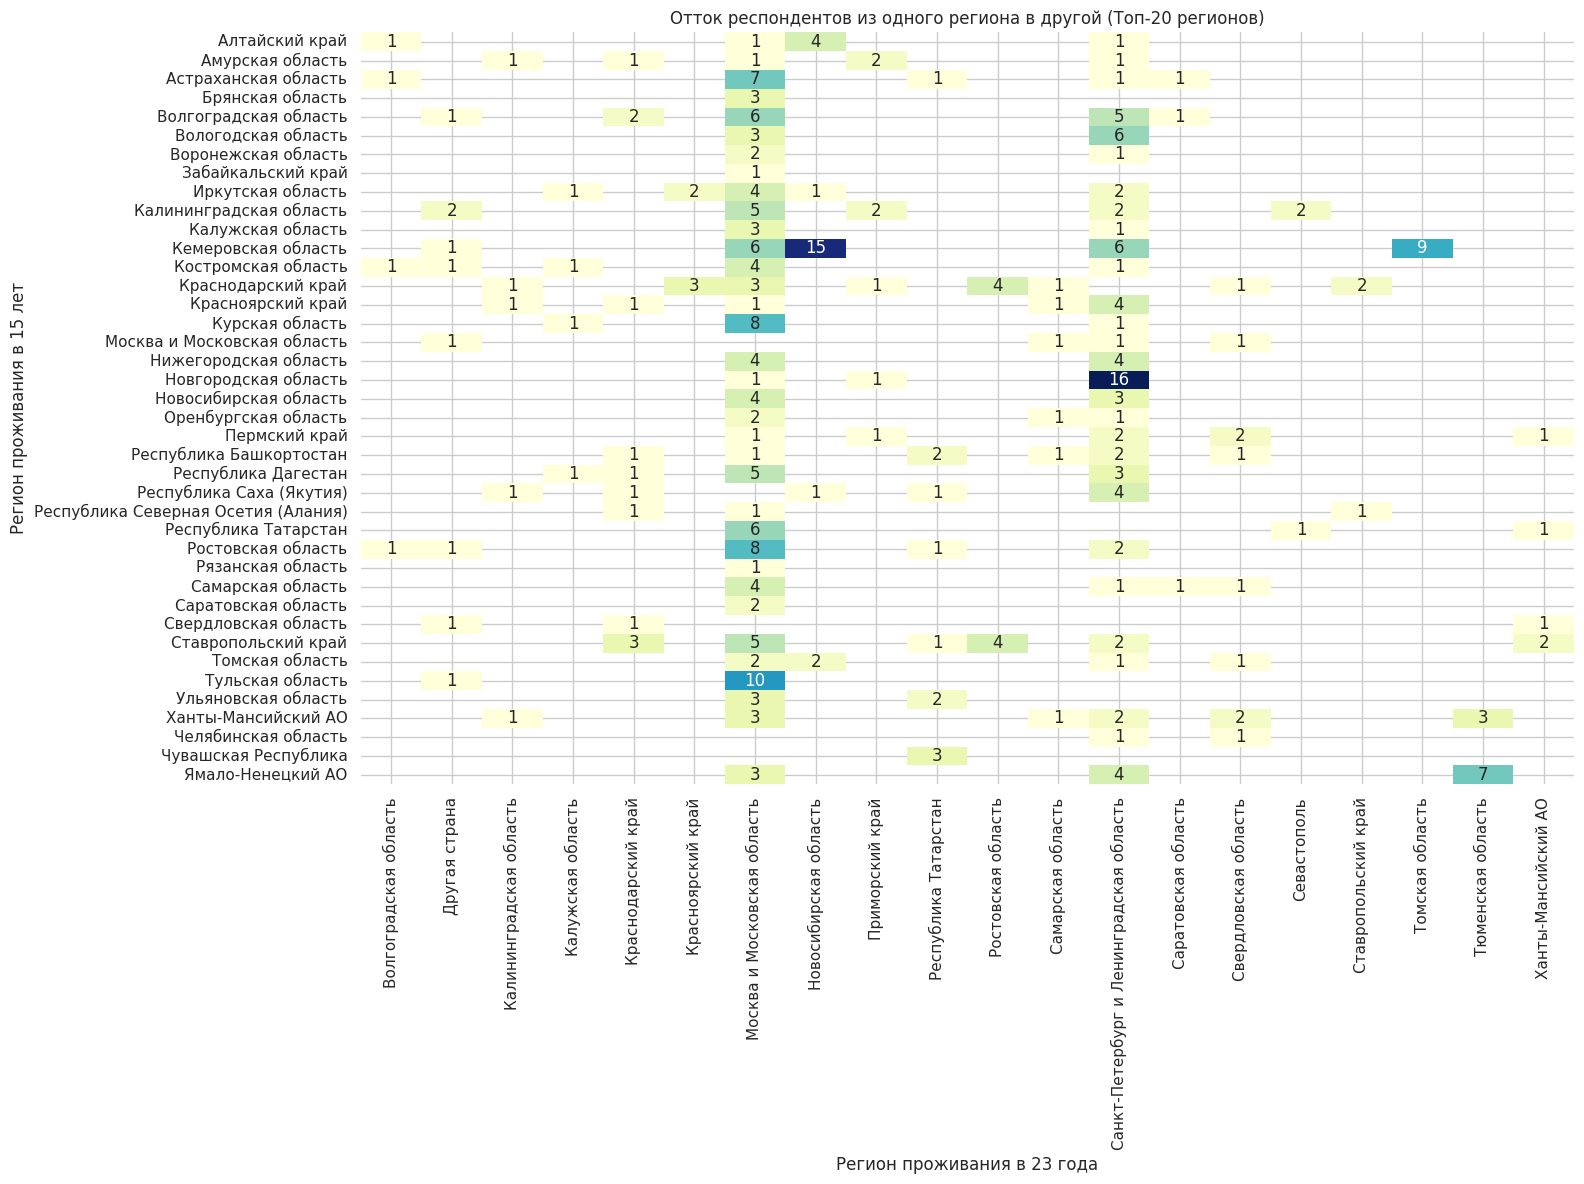

In [19]:
# Выбираем топ-20 регионов, в которых переехали к 23 годам респонденты
top_20_regions = df[df['migration29'] == 1]['region9_name'].value_counts().head(20).index

# Создаем сводную таблицу только для топ-20 регионов
migration_table_top_20 = df[df['migration29'] == 1].loc[df['region9_name'].isin(top_20_regions)].pivot_table(index='region2_name', columns='region9_name', aggfunc='size', fill_value=0)

import numpy as np

# Заменяем нули на NaN
migration_table_top_20_nan = migration_table_top_20.replace(0, np.nan)

# Построение тепловой карты для топ-20 регионов без нулей
plt.figure(figsize=(16, 12))  # Увеличиваем размер графика
sns.heatmap(migration_table_top_20_nan, cmap='YlGnBu', annot=True, cbar=False)  # Убираем цветовую шкалу
plt.title("Отток респондентов из одного региона в другой (Топ-20 регионов)")
plt.xlabel("Регион проживания в 23 года")
plt.ylabel("Регион проживания в 15 лет")
plt.xticks(rotation=90)  # Поворачиваем подписи на оси X для лучшей читаемости
plt.tight_layout()
plt.show()


Теперь посмотрим на распределение переменной "доход"

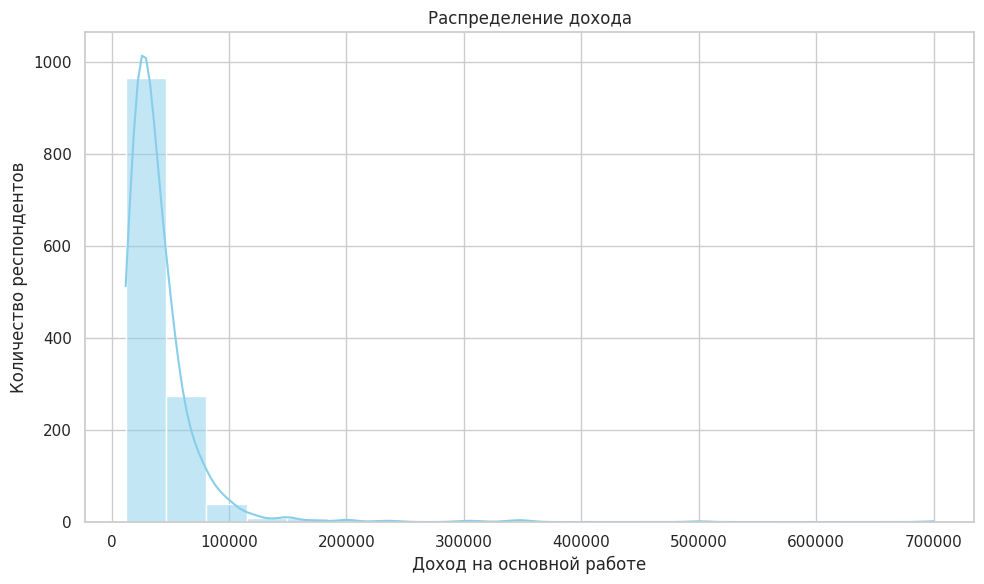

In [23]:
# Создание гистограммы для переменной дохода
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income_job', bins=20, kde=True, color='skyblue')
plt.title('Распределение дохода')
plt.xlabel('Доход на основной работе')
plt.ylabel('Количество респондентов')
plt.tight_layout()
plt.show()


Видим длинный "хвост" в распределении дохода справа. Посмотрим на выбросы, будем использовать показатель квартильного размаха.

In [26]:
# Вычисление межквартильного размаха
Q1 = df['income_job'].quantile(0.25)
Q3 = df['income_job'].quantile(0.75)
IQR = Q3 - Q1

# Определение границы для определения выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация данных для определения выбросов
outliers = df[(df['income_job'] < lower_bound) | (df['income_job'] > upper_bound)]

# Вывод значений, которые были удалены как выбросы
print("Значения, которые были удалены как выбросы:")
print(outliers['income_job'])


Значения, которые были удалены как выбросы:
3       500000
20      100000
141     100000
187     150000
192     340000
         ...  
1216     90000
1223    100000
1228    120000
1257    100000
1300    100000
Name: income_job, Length: 63, dtype: int64


Удалим из датасета значения-выбросы

In [28]:
# Удаление выбросов из исходного датасета
df = df[(df['income_job'] >= lower_bound) & (df['income_job'] <= upper_bound)]

Посмотрим на описательные статистики количественных переменных:
- доход
- баллы ЕГЭ по математике
- баллы ЕГЭ по русскому
- результаты тестов на математическую грамотность (8 класс)
- результаты тестов на читательскую грамотность (8 класс)
- результаты тестов на естественнонаучную грамотность (8 класс)

In [29]:
# Вывод описательных статистик для переменной дохода, баллов ЕГЭ и баллов PISA
print("Описательные статистики для переменной дохода:")
print(df['income_job'].describe())

print("\nОписательные статистики для баллов ЕГЭ по русскому:")
print(df['rus'].describe())

print("\nОписательные статистики для баллов ЕГЭ по математике:")
print(df['math'].describe())

print("\nОписательные статистики для баллов PISA по математике:")
print(df['pisa_math'].describe())

print("\nОписательные статистики для баллов PISA по чтению:")
print(df['pisa_read'].describe())

print("\nОписательные статистики для баллов PISA по естественным наукам:")
print(df['pisa_science'].describe())


Описательные статистики для переменной дохода:
count     1243.000000
mean     35100.513274
std      16434.919554
min      12000.000000
25%      23000.000000
50%      30000.000000
75%      45000.000000
max      87000.000000
Name: income_job, dtype: float64

Описательные статистики для баллов ЕГЭ по русскому:
count    1243.000000
mean       68.135157
std        14.461490
min         3.000000
25%        60.000000
50%        69.000000
75%        78.000000
max       100.000000
Name: rus, dtype: float64

Описательные статистики для баллов ЕГЭ по математике:
count    1243.000000
mean       50.998391
std        16.687957
min         3.000000
25%        40.000000
50%        50.000000
75%        64.000000
max       100.000000
Name: math, dtype: float64

Описательные статистики для баллов PISA по математике:
count    1243.000000
mean      522.131244
std        72.607758
min       278.554000
25%       471.888000
50%       524.622000
75%       572.606000
max       798.184000
Name: pisa_math, dtype:

Посмотрим на распределение переменной с полученным образованием

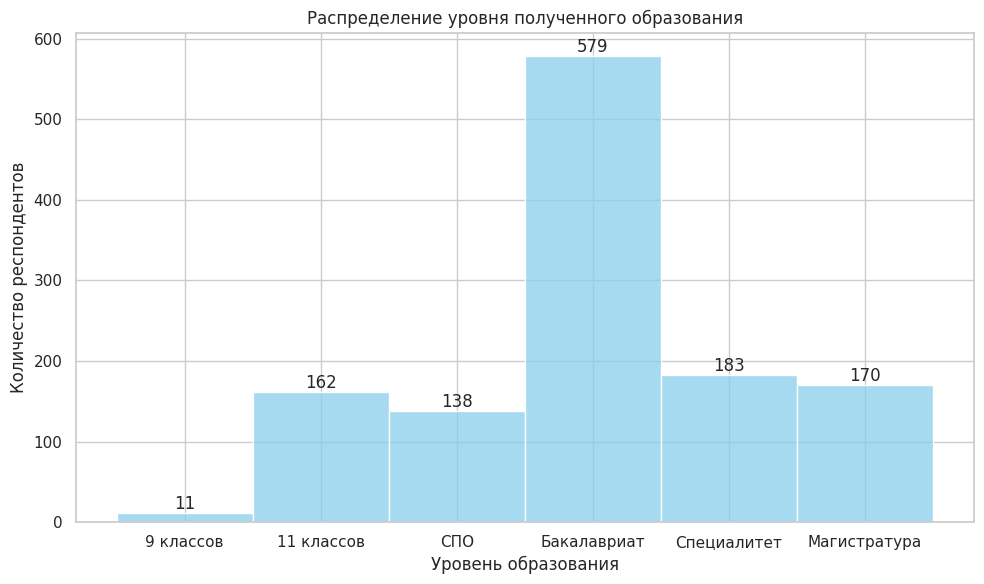

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='finished_education', bins=range(1, 8), discrete=True, color='skyblue')
plt.title('Распределение уровня полученного образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество респондентов')
plt.xticks(ticks=range(1, 7), labels=['9 классов', '11 классов', 'СПО', 'Бакалавриат', 'Специалитет', 'Магистратура'])

# Добавление цифр с количеством респондентов
for i in range(1, 7):
    count = df[df['finished_education'] == i].shape[0]
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

И визуализируем последнюю переменную - семейный статус

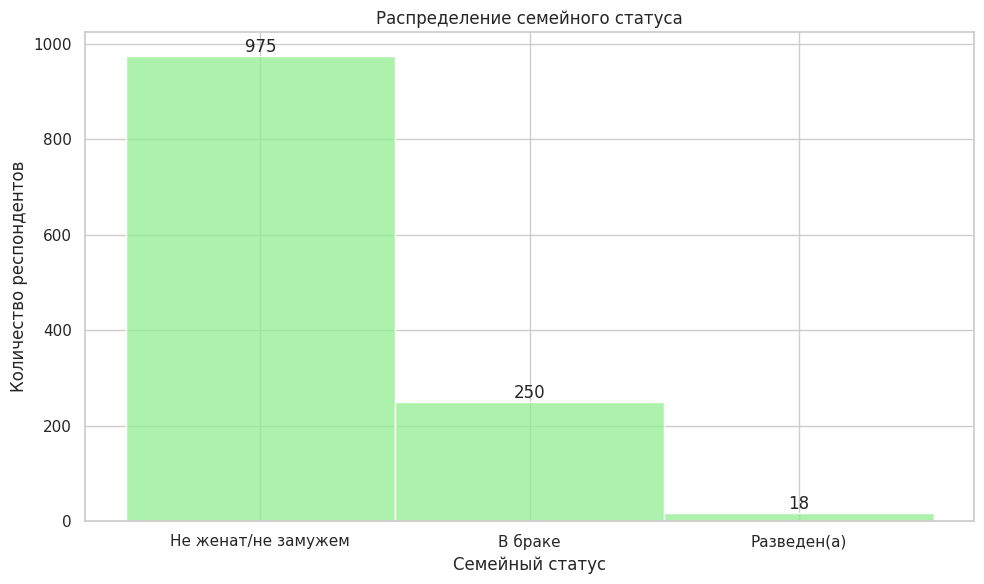

In [32]:
# Создание гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='marital_status', bins=range(1, 4), discrete=True, color='lightgreen')
plt.title('Распределение семейного статуса')
plt.xlabel('Семейный статус')
plt.ylabel('Количество респондентов')
plt.xticks(ticks=range(1, 4), labels=['Не женат/не замужем', 'В браке', 'Разведен(а)'])

# Добавление цифр с количеством респондентов
for i in range(1, 4):
    count = df[df['marital_status'] == i].shape[0]
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Использование методов машинного обучения.**

Постараемся предсказать доход, исходя из всех прочих признаков.

Для этого далее реализуем следующие шаги:
1. **Подготовка данных**: Разделим данные на признаки (features) и целевую переменную (target). В качестве признаков выступят все остальные столбцы, кроме income_job, а income_job будет целевой переменной.

2. **Разделение данных**: Разделим данные на обучающий и тестовый наборы в соотношении 70/30.

3. **Построим модель**: Обучим модель случайного леса на обучающем наборе данных.

4. **Оценим модели**: Оценим эффективность модели на тестовом наборе данных с помощью метрик оценки регрессии, например, среднеквадратичная ошибка (Mean Squared Error, MSE) или коэффициент детерминации (R^2).

5. **Интерпретация результатов**: Проанализируем важность признаков, чтобы понять, какие из них оказывают наибольшее влияние на прогнозируемый уровень дохода.

**Дальнейшие шаги**: В зависимости от результатов, которые будут полчены, можно будет попробовать улучшить модель, изменяя гиперпараметры, добавляя или удаляя признаки и т. д.

Шаг 1. Разделим данные на признаки (features) и целевую переменную (target). В качестве признаков выступят все остальные столбцы, кроме income_job, а income_job будет целевой переменной.

In [33]:
# Подготовка данных: Разделение данных на признаки и целевую переменную
features = df.drop(columns=['income_job'])  # Признаки (все столбцы, кроме 'income_job')
target = df['income_job']  # Целевая переменная ('income_job')

# Просмотрим первые строки каждого из наборов данных, чтобы убедиться, что все правильно
print("Признаки (features):\n", features.head())
print("\nЦелевая переменная (target):\n", target.head())

Признаки (features):
         id                         region2_name  \
0  3010113  Республика Северная Осетия (Алания)   
1  3020102  Республика Северная Осетия (Алания)   
2  3020107  Республика Северная Осетия (Алания)   
4  3020111  Республика Северная Осетия (Алания)   
5  3020113  Республика Северная Осетия (Алания)   

                          region9_name  migration29 gender  math  rus  \
0  Республика Северная Осетия (Алания)            0    муж    67   59   
1  Республика Северная Осетия (Алания)            0    жен    24   49   
2  Республика Северная Осетия (Алания)            0    муж    40   50   
4                  Сахалинская область            1    муж    55   40   
5  Республика Северная Осетия (Алания)            0    муж    36   34   

   finished_education  pisa_math  pisa_read  pisa_science  marital_status  \
0                   3    461.608    372.082       529.038               1   
1                   4    470.874    509.950       509.736               1   
2

Разделение данных: Разделим данные на обучающий и тестовый наборы в соотношении 70/30.

In [34]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающий и тестовый наборы (70% на обучение, 30% на тест)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Проверка размеров обучающего и тестового наборов
print("Размеры обучающего набора:", X_train.shape, y_train.shape)
print("Размеры тестового набора:", X_test.shape, y_test.shape)

Размеры обучающего набора: (870, 15) (870,)
Размеры тестового набора: (373, 15) (373,)


Данных немного, но пока продолжим с этими данными.

Преобразуем переменную регион в числовую с помощью Label Encoding.

In [37]:
from sklearn.preprocessing import LabelEncoder

# Создаем копии данных для безопасности
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Создаем объект LabelEncoder
label_encoder = LabelEncoder()

# Объединяем обучающий и тестовый наборы данных для получения списка всех уникальных значений
combined_data = pd.concat([X_train_encoded, X_test_encoded])

# Применяем label encoding к каждому категориальному признаку
for col in combined_data.columns:
    if combined_data[col].dtype == 'object':  # Проверяем, является ли столбец категориальным
        combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Разделяем обратно обработанные данные на обучающий и тестовый наборы
X_train_encoded = combined_data[:len(X_train_encoded)]
X_test_encoded = combined_data[len(X_train_encoded):]

# Проверяем первые строки преобразованных данных, чтобы убедиться, что все правильно
print("Преобразованные данные обучающего набора:\n", X_train_encoded.head())
print("\nПреобразованные данные тестового набора:\n", X_test_encoded.head())


Преобразованные данные обучающего набора:
            id  region2_name  region9_name  migration29  gender  math  rus  \
933   4510114            34            52            0       0    64   87   
1239  5020103            16            23            0       1    48   66   
417   3710302            33            51            0       0    50   56   
749   4220405            26            23            1       0    60   83   
834   4310423             9            12            0       0    48   71   

      finished_education  pisa_math  pisa_read  pisa_science  marital_status  \
933                    2    656.342    601.214       640.284               1   
1239                   4    485.206    502.400       575.662               1   
417                    4    413.782    449.582       404.830               2   
749                    6    459.268    477.624       393.920               1   
834                    4    507.174    502.090       490.248               1   

      region2

Построим модель: Обучим модель случайного леса на обучающем наборе данных.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Инициализация и обучение модели случайного леса
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train_encoded, y_train)

# Предсказание на тестовом наборе данных
y_pred = random_forest.predict(X_test_encoded)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)


Среднеквадратичная ошибка (MSE): 253956967.83710024


Огромная MSE ☹
Попробуем исключить переменные регион и сравнить результаты.

In [39]:
# Удаляем переменные, связанные с регионами
X_train_no_regions = X_train_encoded.drop(['region2_label_encoded', 'region9_label_encoded'], axis=1)
X_test_no_regions = X_test_encoded.drop(['region2_label_encoded', 'region9_label_encoded'], axis=1)

# Инициализация и обучение модели случайного леса без переменных регионов
random_forest_no_regions = RandomForestRegressor(random_state=42)
random_forest_no_regions.fit(X_train_no_regions, y_train)

# Предсказание на тестовом наборе данных
y_pred_no_regions = random_forest_no_regions.predict(X_test_no_regions)

# Оценка качества модели без переменных регионов
mse_no_regions = mean_squared_error(y_test, y_pred_no_regions)
print("Среднеквадратичная ошибка без переменных регионов (MSE):", mse_no_regions)


Среднеквадратичная ошибка без переменных регионов (MSE): 252404439.71085683


Посмотрим матрицу корреляций

<ipython-input-50-0d957eeff14f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_variables.corr()


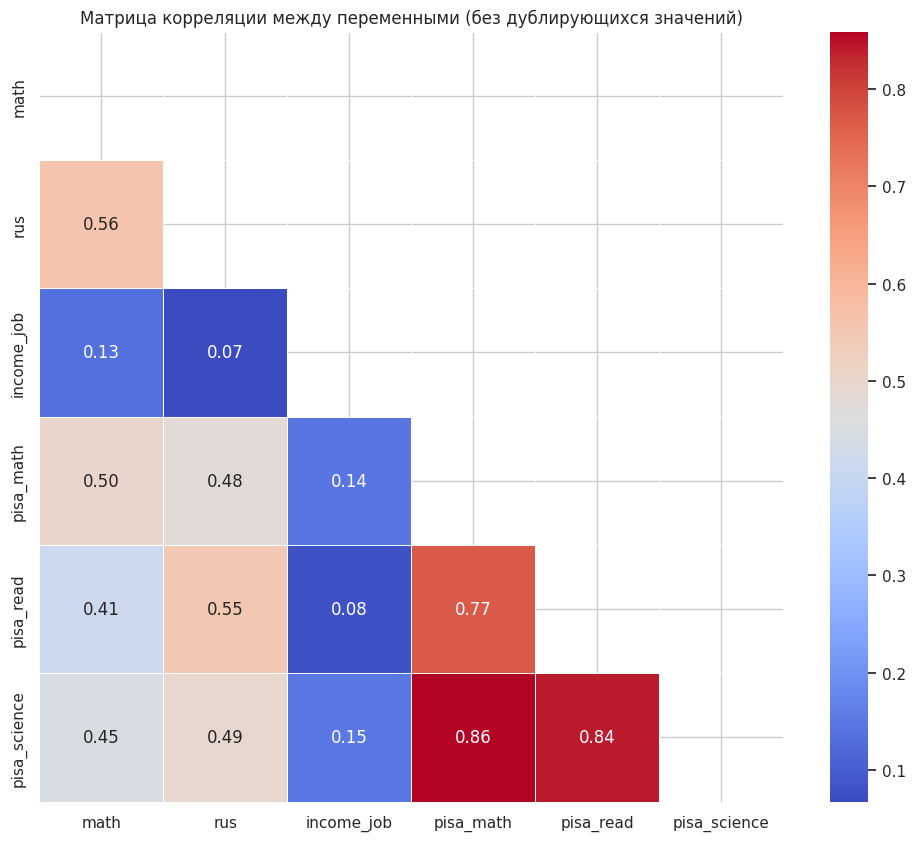

In [50]:
# Импорт необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt

# Создание матрицы корреляции без ненужных переменных
cols_to_drop = ['id', 'migration29', 'finished_education', 'region2_label_encoded', 'region9_label_encoded', 'marital_status', 'gender_encoded']
corr_variables = df.drop(columns=cols_to_drop)
corr_matrix = corr_variables.corr()

# Создание фигуры для отображения тепловой карты
plt.figure(figsize=(12, 10))

# Создание маски для отображения только верхней части матрицы корреляции
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Построение тепловой карты корреляции
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Установка заголовка для тепловой карты
plt.title('Матрица корреляции между переменными (без дублирующихся значений)')

# Отображение тепловой карты
plt.show()


Во-первых, видим, что переменная доход имеет очень слабую корреляцию с другими количественными переменными.
Во-вторых, видим сильно коррелирующие между собой переменные.

Построим еще одну модель.

In [53]:
# Удаление ненужных переменных и разделение данных на обучающий и тестовый наборы
X = df.drop(columns=['id', 'region2_name', 'region9_name', 'gender',  'region2_label_encoded', 'region9_label_encoded', 'marital_status', 'gender_encoded'])
y = df['income_job']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели случайного леса
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Оценка производительности модели
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)


Среднеквадратичная ошибка (MSE): 34590.79577050939


Видим, что MSE все еще очень высока, однако существенно меньше той, что была.
Построим модель градиентного бустинга.

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Создание модели градиентного бустинга
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Обучение модели на обучающем наборе данных
gradient_boosting.fit(X_train, y_train)

# Предсказание значений на тестовом наборе данных
y_pred = gradient_boosting.predict(X_test)

# Вычисление среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Среднеквадратичная ошибка (MSE) для модели градиентного бустинга:", mse)

Среднеквадратичная ошибка (MSE) для модели градиентного бустинга: 24154.70995940423


MSE стала меньше.
Рассмотрим ridge регрессию.

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Создание объекта модели
ridge_model = Ridge()

# Обучение модели на обучающем наборе данных
ridge_model.fit(X_train, y_train)

# Прогнозирование значений на тестовом наборе данных
ridge_predictions = ridge_model.predict(X_test)

# Оценка качества модели
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Среднеквадратичная ошибка (MSE) для модели ridge регрессии:", ridge_mse)

Среднеквадратичная ошибка (MSE) для модели ridge регрессии: 5.683853091092793e-15


Среднеквадратичная ошибка (MSE) для модели Ridge регрессии составляет 5.68e-15, что означает, что модель хорошо соответствует данным. Такая низкая ошибка может указывать на то, что модель слишком сильно подогнана под обучающие данные, что может привести к переобучению. В таком случае можно попробовать уменьшить сложность модели или использовать методы регуляризации для управления переобучением.

Попробуем снизить сложность модели, добавив параметр регуляризации. Для этого мы можем использовать Lasso регрессию, которая применяет L1-регуляризацию и может помочь в уменьшении переобучения

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Создание и обучение модели Lasso регрессии
lasso_reg = Lasso(alpha=0.1)  # Устанавливаем параметр регуляризации alpha
lasso_reg.fit(X_train, y_train)

# Прогнозирование на тестовом наборе данных
y_pred_lasso = lasso_reg.predict(X_test)

# Оценка производительности модели
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Среднеквадратичная ошибка (MSE) для модели Lasso регрессии:", mse_lasso)

Среднеквадратичная ошибка (MSE) для модели Lasso регрессии: 2.05826862562337e-05


Выглядит так, что модель Lasso регрессии хорошо нам подходит. Визуализируем модель.

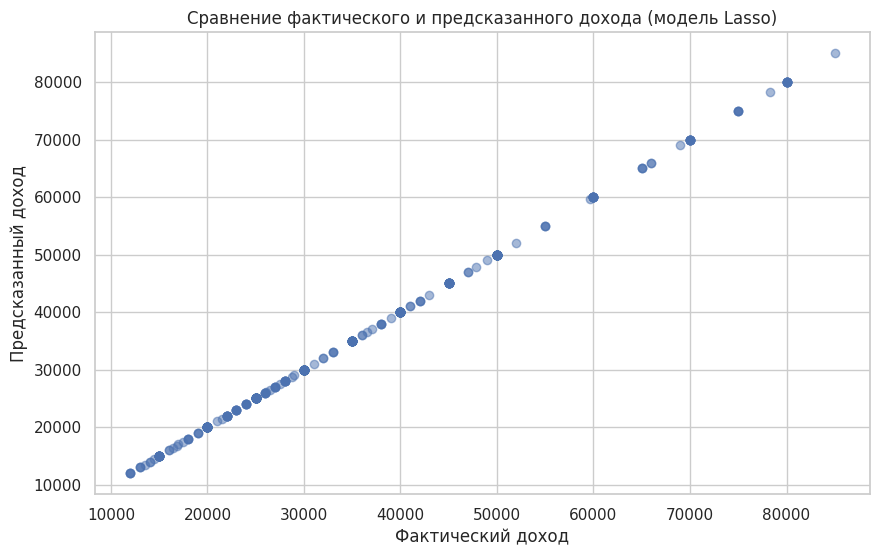

In [61]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Инициализация и обучение модели Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Получение фактических и предсказанных значений дохода
actual_income = y_test
predicted_income = lasso_model.predict(X_test)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(actual_income, predicted_income, alpha=0.5)
plt.xlabel('Фактический доход')
plt.ylabel('Предсказанный доход')
plt.title('Сравнение фактического и предсказанного дохода (модель Lasso)')
plt.show()


По графику видим, что фактический и предсказанный доход почти идеально совпадают. Возможно, модель Lasso слишком сильно подогналась под обучающие данные и переобучилась, что привело к исключительно низкой ошибке на тестовых данных.

Два вывода по дз:
1. Доход в 23 года действительно может быть достаточно случайным и не зависеть ни от образования, ни от региона. Вероятно, изначально для датасета были подобраны нерелеватные данные.
2. Пока у меня нет понимания методов машинного обучения кроме регрессии и пока я во многом двигаюсь "методом тыка".

Думаю, в дальнейшем я продолжу как изучать сам датасет (небольшой, к сожалению), так и в более медленном и равномерном темпе изучать модели машинного обучения.